In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [54]:
df= pd.read_csv('Weather.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,10001,01-07-1942,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,02-07-1942,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,03-07-1942,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,04-07-1942,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,05-07-1942,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.drop(['STA','Date','Precip','WindGustSpd','PoorWeather','DR','SPD'],axis=1,inplace=True)

In [57]:
df.drop(['Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1,inplace=True)

In [58]:
df.drop('SNF',axis=1,inplace=True)

In [71]:
df.drop('Snowfall',axis=1,inplace=True)

In [72]:
df.drop('Unnamed: 19',axis=1,inplace=True)

In [73]:
df.head()

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,PRCP,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,42,7,1,0.04,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,42,7,2,0,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,42,7,3,0.1,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,42,7,4,0.1,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,42,7,5,0,80.0,71.0,76.0


In [74]:
df.describe()

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,118566.000000,118572.000000,118542.000000
mean,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843
std,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.869361,14.481498,14.211082
min,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000
50%,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   119040 non-null  float64
 1   MinTemp   119040 non-null  float64
 2   MeanTemp  119040 non-null  float64
 3   YR        119040 non-null  int64  
 4   MO        119040 non-null  int64  
 5   DA        119040 non-null  int64  
 6   PRCP      117108 non-null  object 
 7   MAX       118566 non-null  float64
 8   MIN       118572 non-null  float64
 9   MEA       118542 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 9.1+ MB


In [76]:
df.shape

(119040, 10)

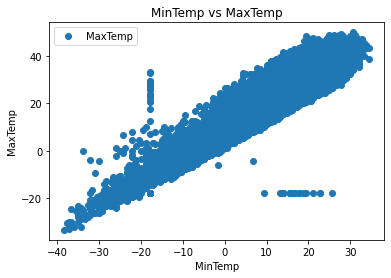

In [78]:
df.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


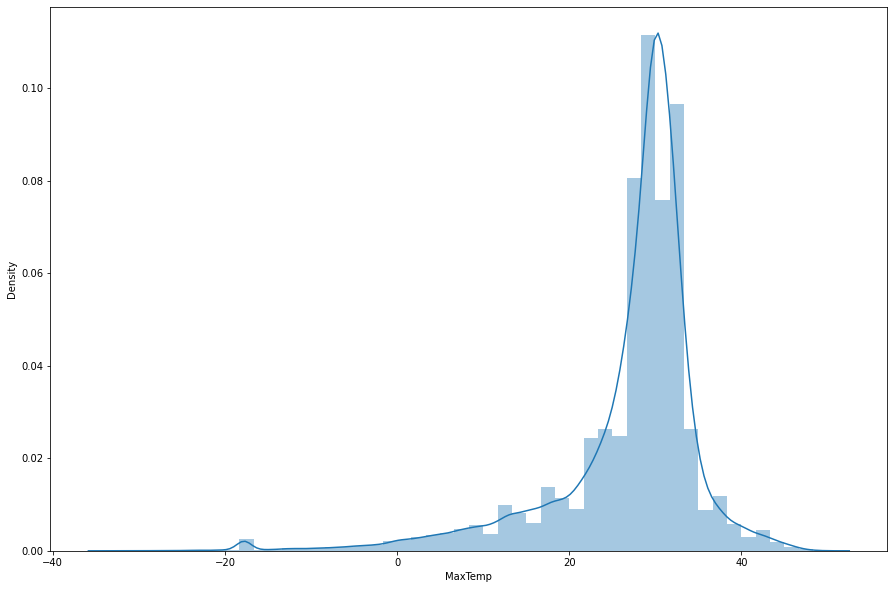

In [79]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['MaxTemp'])

In [81]:
X = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [85]:
y_pred = regressor.predict(X_test)

In [86]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


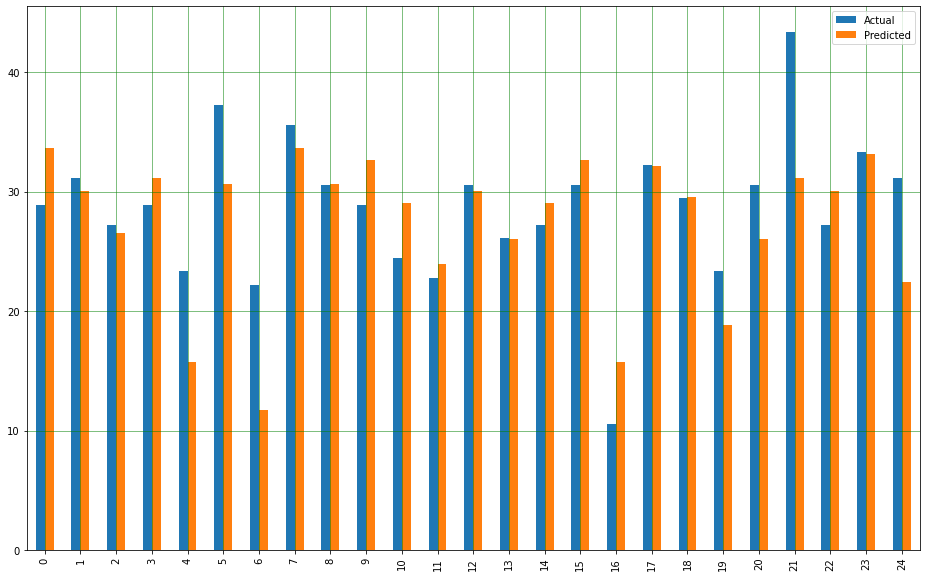

In [87]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

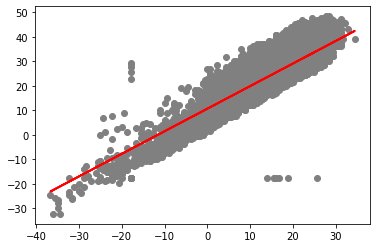

In [88]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204
